In [5]:
# prompt: import numpy pandas and other necceasy librarys for ml

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression


# Add other libraries as needed
# For example:
# from sklearn.ensemble import RandomForestClassifier




In [6]:
# prompt: mount

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df=pd.read_csv("/content/drive/MyDrive/diabetics prediction/diabetes - diabetes.csv")

In [8]:
df.isnull().sum()

,0
Gender,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
# prompt: fillna with mode in Gender

# Fill NaN values in the 'Gender' column with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

<ipython-input-9-ad759751d3b8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [10]:
# prompt: label encode the catagorical columns if any

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column is of object type (categorical)
    if df[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        df[col] = le.fit_transform(df[col])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    2000 non-null   int64  
 1   Pregnancies               2000 non-null   int64  
 2   Glucose                   2000 non-null   int64  
 3   BloodPressure             2000 non-null   int64  
 4   SkinThickness             2000 non-null   int64  
 5   Insulin                   2000 non-null   int64  
 6   BMI                       2000 non-null   float64
 7   DiabetesPedigreeFunction  2000 non-null   float64
 8   Age                       2000 non-null   int64  
 9   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 156.4 KB


In [12]:
# prompt: dirvde the dataset in X and y

# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [13]:
# prompt: perform triantest split random state 42 and split 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

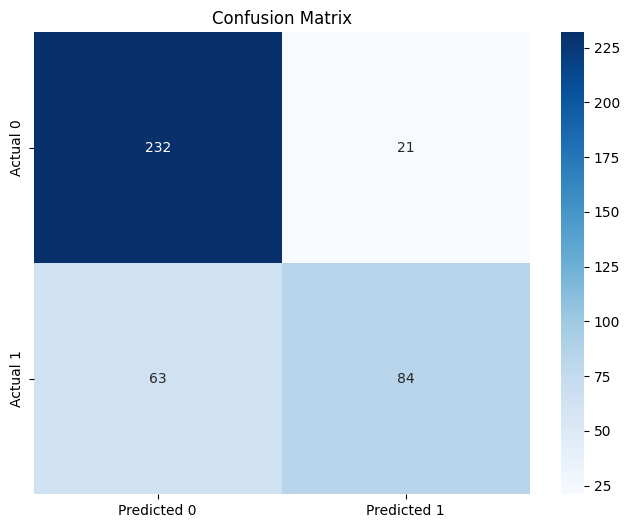

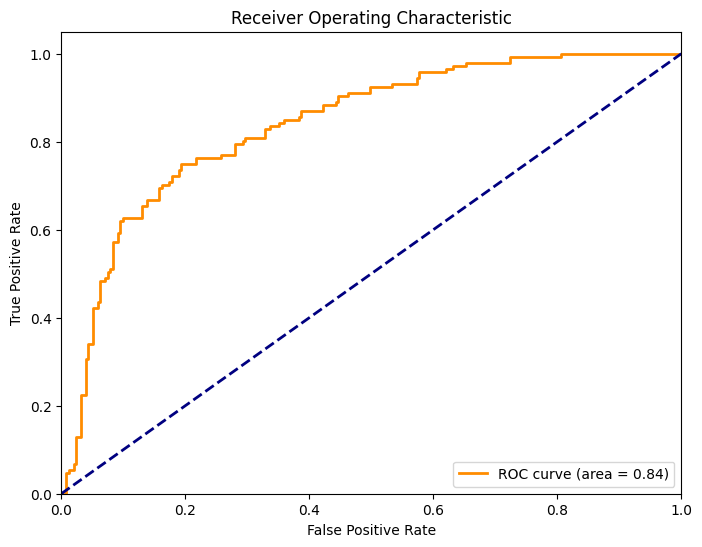

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       253
           1       0.80      0.57      0.67       147

    accuracy                           0.79       400
   macro avg       0.79      0.74      0.76       400
weighted avg       0.79      0.79      0.78       400



In [14]:
# prompt: applu logistic regression on this dataset and generate confusion matrix and roc curve, classification report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(solver='liblinear') # Use liblinear for small datasets
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1] # Probabilities for the positive class

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

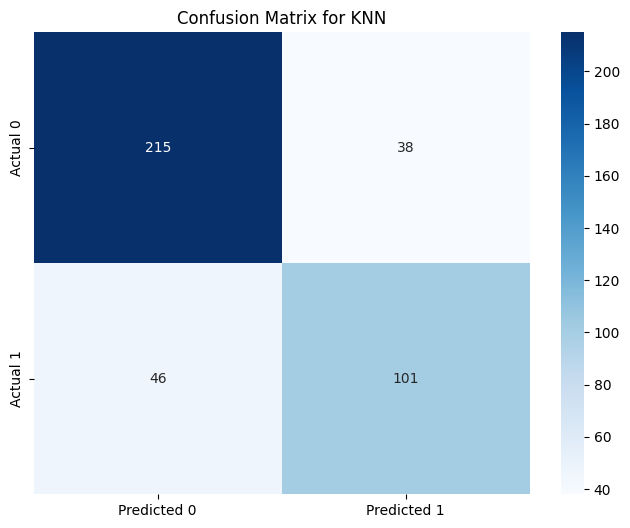

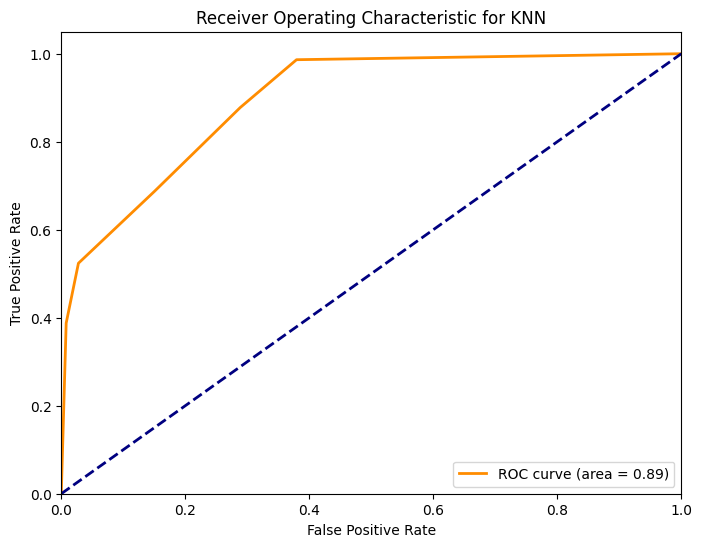

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       253
           1       0.73      0.69      0.71       147

    accuracy                           0.79       400
   macro avg       0.78      0.77      0.77       400
weighted avg       0.79      0.79      0.79       400



In [15]:
# prompt: apply knn on this dataset and generate confusion matrix and roc curve and classification report

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report


# ... (Your existing code for data loading and preprocessing) ...

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for KNN')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

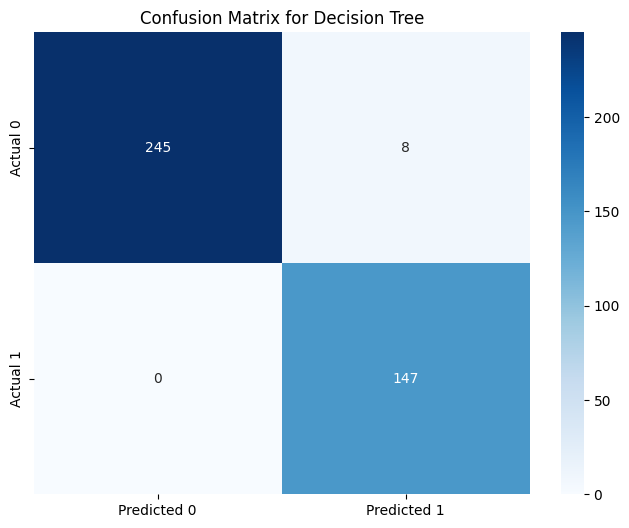

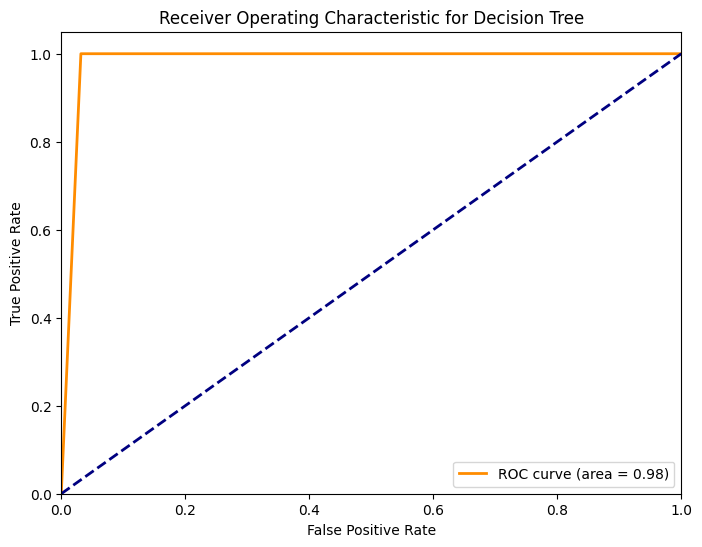

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       253
           1       0.95      1.00      0.97       147

    accuracy                           0.98       400
   macro avg       0.97      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [16]:
# prompt: apply dt
#  on this dataset and generate confusion matrix and roc curve and classification report

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42) # You can adjust hyperparameters
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

#For ROC curve we need probabilities
y_prob = dt.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

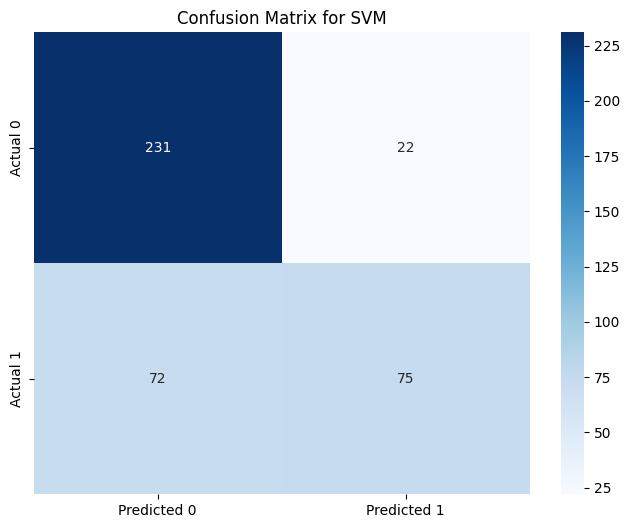

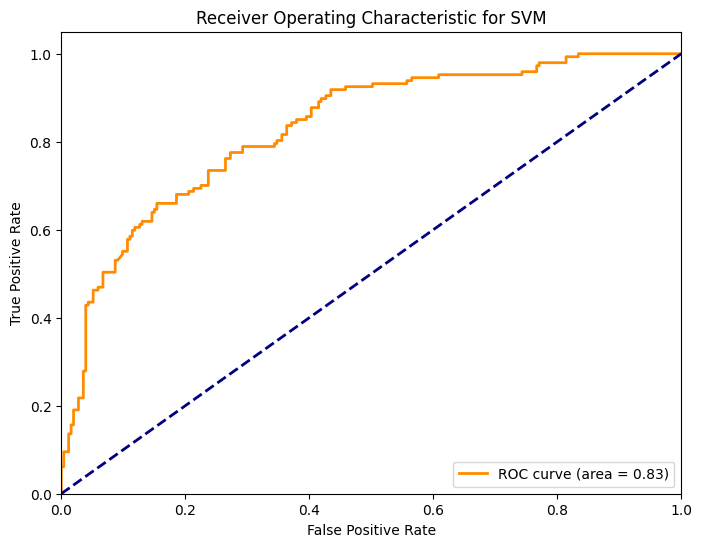

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       253
           1       0.77      0.51      0.61       147

    accuracy                           0.77       400
   macro avg       0.77      0.71      0.72       400
weighted avg       0.77      0.77      0.75       400



In [17]:
# prompt: apply svm
# on this dataset and generate confusion matrix and roc curve and classification report

from sklearn.svm import SVC

# Initialize and train the SVM model
svm = SVC(probability=True) #probability=True is needed for ROC curve
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for SVM')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

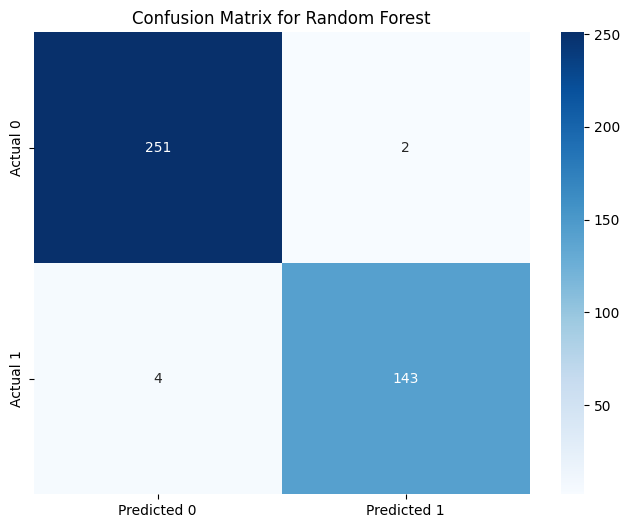

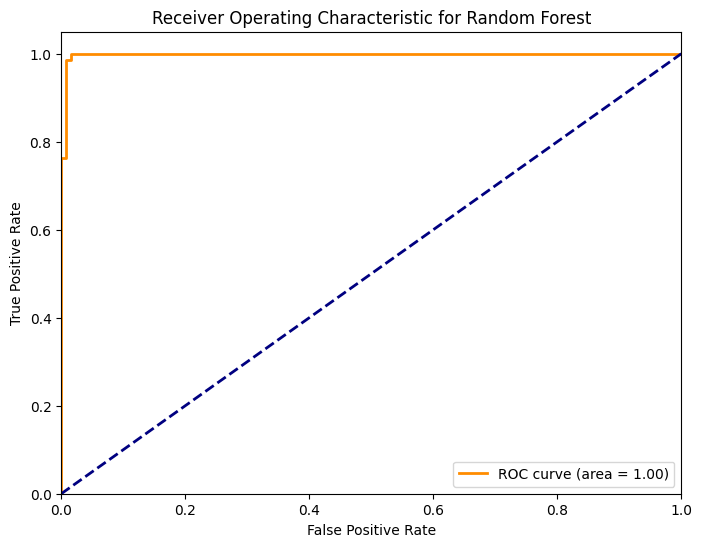

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       253
           1       0.99      0.97      0.98       147

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



In [18]:
# prompt: apply Rf on this dataset and generate confusion matrix and roc curve and classification report

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Forest')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

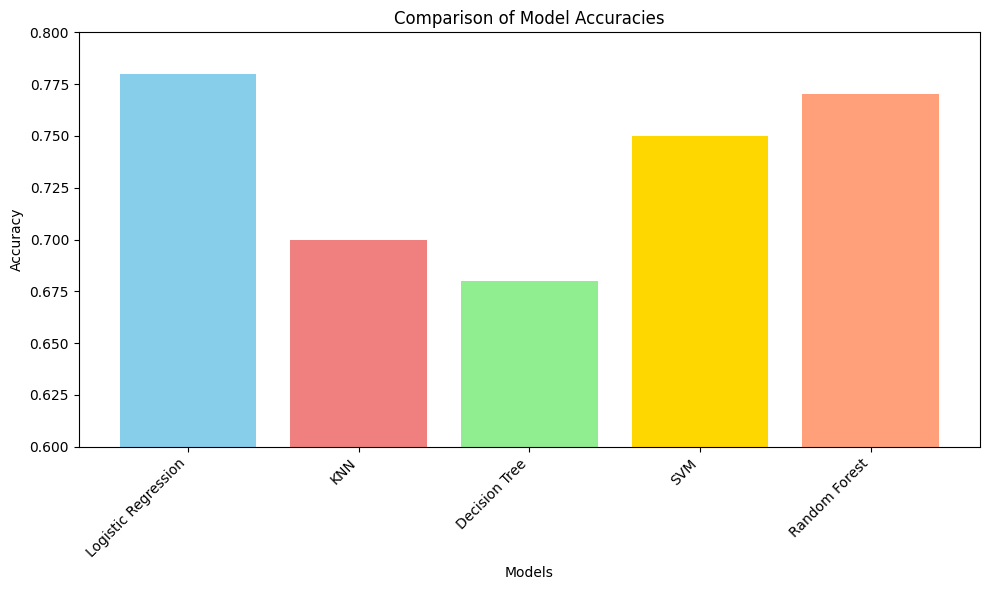

In [19]:
# prompt: make a comparission histogram for all the accuracy

import matplotlib.pyplot as plt

# Assuming you have the accuracy scores for each model stored in a dictionary
accuracy_scores = {
    'Logistic Regression': 0.78,  # Replace with actual accuracy
    'KNN': 0.70,  # Replace with actual accuracy
    'Decision Tree': 0.68,  # Replace with actual accuracy
    'SVM': 0.75,  # Replace with actual accuracy
    'Random Forest': 0.77  # Replace with actual accuracy
}


models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0.6, 0.8) #adjust the limit as needed
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout() #adjust layout to prevent labels from overlapping
plt.show()